# EP2 - MANDELBROT COM OPENMPI, OPENMPI-PTHREADS E OPENMPI-OPENMP

## Alunos

* Daniel Brasil Magnani - 12630214
* Felipe Martim Fernandes Vieira - 12630242
* Karina de Carvalho Froes - 9297655
* Magali Lemes do Sacramento - 10805420

## Descrição dos experimentos

Foram realizadas 15 medições variando-se o número de processos (podendo ser 1,8,16,32,64) e número de threads (uma potência de 2 entre $2^{0}$ e $2^{5}$) para o seguinte cenário fixo do conjunto Mandelbrot:
* Região: Triple Spiral Valley
* Tamanho de imagem: 4096




As bibliotecas utilizadas foram Pthreads, OpenMP e OpenMPI.

As visualizações foram criadas com seus devidos intervalos de confiança de 95% segundo a distribuição T Student com 14 graus de liberdade, dado o pequeno valor da amostra coletada para os experimentos.

O computador utilizado para executar os experimentos possui um processador Intel(R) Xeon(R) CPU E5-2670 0 @ 2.60GHz de 32 núcleos, 64GB de memória RAM e sistema operacional Debian 4.19.171-2.

## Análises e gráficos
Para começar a análise dos dados e sua visualização, precisamos importar as bibliotecas conforme comando abaixo:

In [12]:
import Pkg; Pkg.add("CSV"); Pkg.add("DataFrames"); Pkg.add("Gadfly"); Pkg.add("DataFramesMeta")

In [47]:
using CSV
using DataFrames
using DataFramesMeta
using Gadfly
# using CategoricalArrays
set_default_plot_size(25cm, 12cm)

In [56]:
df = DataFrame(CSV.File("results2.tsv", header=1, delim="\t"))
first(df, 5)

,Algorithm,Image,Size,Threads,Time,Stddev,Clock
,String,String,Int64,Int64,Float64,Float64,String
1,mandelbrot_ompi,triple_spiral.log,4096,1,32.04,1.15,"26,688.44"
2,mandelbrot_ompi,triple_spiral.log,4096,1,9.86,1.04,"40,245.54"
3,mandelbrot_ompi,triple_spiral.log,4096,1,7.972,0.435,"55,062.27"
4,mandelbrot_ompi,triple_spiral.log,4096,1,8.704,0.636,"113,943.64"
5,mandelbrot_ompi,triple_spiral.log,4096,1,9.303,0.285,"192,489.17"


Transformando em categóricas algumas colunas que estão como numéricas

In [57]:
df = @linq df |>
    transform(Threads = string.(:Threads)) |>
    transform(Tasks = string.(:Tasks));

Separando os dados relacionados a cada algoritmo em df diferentes:

In [83]:
## EP2
df_ompi = filter(row -> row.Algorithm == "mandelbrot_ompi", df)
df_ompi_pth = filter(row -> row.Algorithm == "mandelbrot_ompi_pth", df)
df_ompi_omp = filter(row -> row.Algorithm == "mandelbrot_ompi_omp", df)
first(df_ompi_omp, 5)


,Algorithm,Image,Size,Threads,Time,Stddev,Clock
,String,String,Int64,String,Float64,Float64,String
1,mandelbrot_ompi_omp,triple_spiral.log,4096,1,30.51,0.643,"26,991.99"
2,mandelbrot_ompi_omp,triple_spiral.log,4096,2,20.262,0.542,"29,662.62"
3,mandelbrot_ompi_omp,triple_spiral.log,4096,4,20.947,0.757,"30,954.01"
4,mandelbrot_ompi_omp,triple_spiral.log,4096,8,20.902,0.702,"31,423.06"
5,mandelbrot_ompi_omp,triple_spiral.log,4096,16,23.002,0.884,"31,600.72"


# Como e por que as três versões do programa se comportam com a variação:

## Do número de processos ?

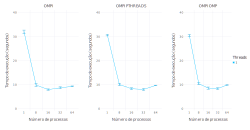

In [84]:
df_ompi1 = filter(row -> row.Algorithm == "mandelbrot_ompi" && row.Threads == "1", df_ompi)
df_ompi_pth1 = filter(row -> row.Algorithm == "mandelbrot_ompi_pth" && row.Threads == "1", df_ompi_pth)
df_ompi_omp1 = filter(row -> row.Algorithm == "mandelbrot_ompi_omp" && row.Threads == "1", df_ompi_omp)
first(df_ompi_omp, 5)


ymins = df_ompi1.Time .- 2.262 * (df_ompi1.Stddev / sqrt(14))
ymaxs = df_ompi1.Time .+ 2.262 * (df_ompi1.Stddev / sqrt(14))
plota1 = plot(df_ompi1,
    x=:Tasks, 
    y=:Time,
    Guide.xlabel("Número de processos"),
    Guide.ylabel("Tempo de execução (segundos)"),
    ymin=ymins,
    ymax=ymaxs,
    color=:Threads,
    Geom.line,
    Geom.errorbar,
    Guide.title("OMPI"),
    Theme(key_position = :none))

ymins = df_ompi_pth1.Time .- 2.262 * (df_ompi_pth1.Stddev / sqrt(14))
ymaxs = df_ompi_pth1.Time .+ 2.262 * (df_ompi_pth1.Stddev / sqrt(14))
plota2 = plot(df_ompi_pth1,
    x=:Tasks, 
    y=:Time,
    Guide.xlabel("Número de processos"),
    Guide.ylabel("Tempo de execução (segundos)"),
    ymin=ymins,
    ymax=ymaxs,
    color=:Threads,
    Geom.line,
    Geom.errorbar,
    Guide.title("OMPI PTHREADS"),
    Theme(key_position = :none))

ymins = df_ompi_omp1.Time .- 2.262 * (df_ompi_omp1.Stddev / sqrt(14))
ymaxs = df_ompi_omp1.Time .+ 2.262 * (df_ompi_omp1.Stddev / sqrt(14))
plota3 = plot(df_ompi_omp1,
    x=:Tasks, 
    y=:Time,
    Guide.xlabel("Número de processos"),
    Guide.ylabel("Tempo de execução (segundos)"),
    ymin=ymins,
    ymax=ymaxs,
    color=:Threads,
    Geom.line,
    Geom.errorbar,
    Guide.title("OMPI OMP"))



hstack(plota1,plota2, plota3)

Filtrando os dados relativos a uma única thread, podemos observar que para o algoritmo MPI o melhor número de processos é 16 e já para os demais algoritmos é 32. Além disso, notamos que até 16 processos os 3 algoritmos apresentam tempos semelhantes e que os algoritmos OMPI-Pthreads e OMPI-OMP apresentam comportamentos semelhantes em relação aos diferentes números de processos.

## Do número de Threads ?

Aqui vamos demonstrar o impacto da variação do número de threads na performance do tempo dos algoritmos OMPI-Pthreads e OMPI-OMP.

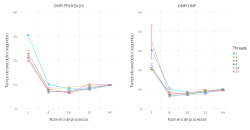

In [92]:
ymins = df_ompi_pth.Time .- 2.262 * (df_ompi_pth.Stddev / sqrt(14))
ymaxs = df_ompi_pth.Time .+ 2.262 * (df_ompi_pth.Stddev / sqrt(14))
plota2 = plot(df_ompi_pth,
    x=:Tasks, 
    y=:Time,
    Guide.xlabel("Número de processos"),
    Guide.ylabel("Tempo de execução (segundos)"),
    ymin=ymins,
    ymax=ymaxs,
    color=:Threads,
    Geom.line,
    Geom.errorbar,
    Guide.title("OMPI PTHREADS"),
    Theme(key_position = :none))

ymins = df_ompi_omp.Time .- 2.262 * (df_ompi_omp.Stddev / sqrt(14))
ymaxs = df_ompi_omp.Time .+ 2.262 * (df_ompi_omp.Stddev / sqrt(14))
plota3 = plot(df_ompi_omp,
    x=:Tasks, 
    y=:Time,
    Guide.xlabel("Número de processos"),
    Guide.ylabel("Tempo de execução (segundos)"),
    ymin=ymins,
    ymax=ymaxs,
    color=:Threads,
    Geom.line,
    Geom.errorbar,
    Guide.title("OMPI OMP"))



hstack(plota2, plota3)

Com esses gráficos, pode-se observar uma diferença marcante entre os 2 algoritmos: ao lançarmos 32 threads no OMPI-OMP com apenas 1 processo, temos um desvio padrão elevado e que atinge os maiores tempos observados para o algoritmo. Já ao lançarmos apenas 1 processo no OMP-Pthreads, ao aumentarmos a quantidade de threads, menor se torna o tempo. No entanto, ao aumentar o número de processos, os 2 algoritmos seguem padrões de tempo semelhantes como destacado anteriormente.

Além disso, agora é possível perceber que podemos encontrar os menores valores de tempo no número de processos = 8 para OMPI-OMP e para OMPI-Pthreads vemos que esse valor se encontra entre número de processos = 8 ou 16. Vamos ampliar agora essa região de interesse para determinar com precisão o valor ótimo para threads e processos em ambos os algoritmos.

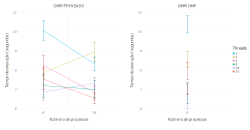

In [93]:
df_ompi_pth_zoom = filter(row -> row.Tasks == "8" || row.Tasks == "16", df_ompi_pth)
df_ompi_omp_zoom = filter(row -> row.Tasks == "8", df_ompi_omp)


ymins = df_ompi_pth_zoom.Time .- 2.262 * (df_ompi_pth_zoom.Stddev / sqrt(14))
ymaxs = df_ompi_pth_zoom.Time .+ 2.262 * (df_ompi_pth_zoom.Stddev / sqrt(14))
plota2 = plot(df_ompi_pth_zoom,
    x=:Tasks, 
    y=:Time,
    Guide.xlabel("Número de processos"),
    Guide.ylabel("Tempo de execução (segundos)"),
    ymin=ymins,
    ymax=ymaxs,
    color=:Threads,
    Geom.line,
    Geom.errorbar,
    Guide.title("OMPI PTHREADS"),
    Theme(key_position = :none))

ymins = df_ompi_omp_zoom.Time .- 2.262 * (df_ompi_omp_zoom.Stddev / sqrt(14))
ymaxs = df_ompi_omp_zoom.Time .+ 2.262 * (df_ompi_omp_zoom.Stddev / sqrt(14))
plota3 = plot(df_ompi_omp_zoom,
    x=:Tasks, 
    y=:Time,
    Guide.xlabel("Número de processos"),
    Guide.ylabel("Tempo de execução (segundos)"),
    ymin=ymins,
    ymax=ymaxs,
    color=:Threads,
    Geom.line,
    Geom.errorbar,
    Guide.title("OMPI OMP"))



hstack(plota2, plota3)

Nesses gráficos, agora filtrados com as regiões de interesse, vemos que o menor tempo encontrado para o algoritmo OMPI-Pthreads é atingido com número de processos = 16 e número de threads = 32 e para OMPI-OMP temos número de processos = 8 e número de threads = 16. 

In [60]:
## dados EP1 para comparação

df_ep1 = DataFrame(CSV.File("results.tsv", header=1, delim="\t"))
first(df, 5)

,Algorithm,Image,Size,Threads,Time,Stddev,Clock
,String,String,Int64,String,Float64,Float64,String
1,mandelbrot_ompi,triple_spiral.log,4096,1,32.04,1.15,"26,688.44"
2,mandelbrot_ompi,triple_spiral.log,4096,1,9.86,1.04,"40,245.54"
3,mandelbrot_ompi,triple_spiral.log,4096,1,7.972,0.435,"55,062.27"
4,mandelbrot_ompi,triple_spiral.log,4096,1,8.704,0.636,"113,943.64"
5,mandelbrot_ompi,triple_spiral.log,4096,1,9.303,0.285,"192,489.17"


In [64]:
df_ep1 = @linq df_ep1 |>
    transform(Threads = string.(:Threads)) |>
    transform(IO = string.(:IO)) |>
    transform(MemAlloc = string.(:MemAlloc));

In [78]:
df_noio_nomem = @linq df_ep1 |>
    where(:IO .== "0") |>
    where(:MemAlloc .== "0");

In [88]:
df_plot = filter(row -> row.Size == 4096 && row.Image == "triple_spiral.log", df_noio_nomem)

,Algorithm,Image,Size,Threads,Time,Stddev,Clock
,String,String,Int64,String,Float64,Float64,Float64
1,mandelbrot_seq,triple_spiral.log,4096,1,0.0011483,2.48e-5,0.58
2,mandelbrot_pth,triple_spiral.log,4096,1,0.0014,5.51e-5,0.84
3,mandelbrot_pth,triple_spiral.log,4096,2,0.001596,0.000128,1.11
4,mandelbrot_pth,triple_spiral.log,4096,4,0.001277,1.63e-5,0.91
5,mandelbrot_pth,triple_spiral.log,4096,8,0.0022432,5.38e-5,1.81
6,mandelbrot_pth,triple_spiral.log,4096,16,0.002659,0.000154,2.47
7,mandelbrot_pth,triple_spiral.log,4096,32,0.003469,0.000103,3.61
8,mandelbrot_omp,triple_spiral.log,4096,1,0.0016499,7.39e-5,1.05
9,mandelbrot_omp,triple_spiral.log,4096,2,0.0016482,6.97e-5,1.17


## Conclusões ##